In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Folder path

path = r'C:\Users\Windows 10\Documents\04-2023 Instacart Basket Analysis'
print(path)

C:\Users\Windows 10\Documents\04-2023 Instacart Basket Analysis


In [3]:
# Importing 'orders_products_customers.pkl'

df_prods_ords_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [4]:
df_prods_ords_cust.shape

(32404859, 31)

In [5]:
df_prods_ords_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,dependants_number,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


#### Sampling Data

In [6]:
# Create a list holding True/False values to the test np.random.rand() <= 0.3
# This “seed” represents a random but reproducible pattern—Python will always give you the same set of random numbers 

np.random.seed(4)
dev = np.random.rand(len(df_prods_ords_cust)) <= 0.3

In [7]:
dev

array([False, False, False, ..., False, False,  True])

In [8]:
# Store 30% of the sample in the dataframe small

small = df_prods_ords_cust[dev]

In [9]:
df_prods_ords_cust.shape

(32404859, 31)

In [10]:
len(small)

9722210

### Continuation from Step 6

#### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [11]:
# Creating a new df that includes only necessary columns

df_age_dependants_number = small[['age','dependants_number']]

In [12]:
df_age_dependants_number.head()

,age,dependants_number
5,31,3
7,31,3
8,31,3
11,31,3
14,31,3


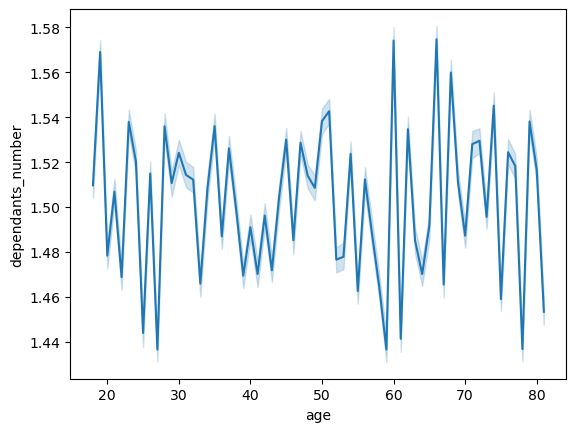

In [13]:
# Creating a line chart for age and dependants_number

line_age_dependants_number = sns.lineplot(data = df_age_dependants_number, x = 'age', y = 'dependants_number')

#### The line chart doesn't show much of a relationship between age and number of dependents, but the 20s and 50s seem to have a downward trend and the 40s and 60s seem to have an upward trend. But overall I don't think there is a real relationship to infer in this line chart

### Step 7

#### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [14]:
# Creating a new df that includes only necessary columns

df_age_income = small[['age','income']]

In [15]:
df_age_income.head()

,age,income
5,31,40423
7,31,40423
8,31,40423
11,31,40423
14,31,40423


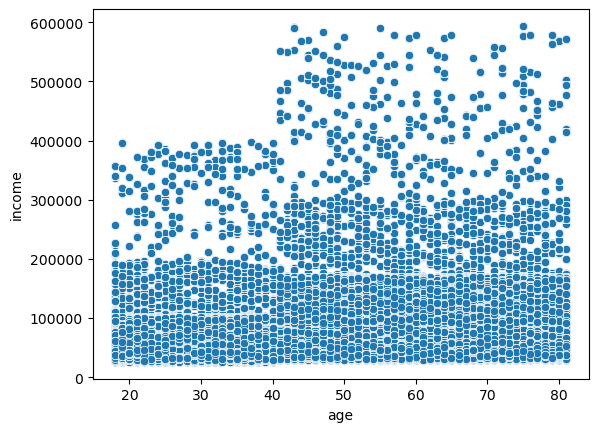

In [16]:
scatterplot_age_income = sns.scatterplot(data = df_age_income, x = 'age', y = 'income')

#### This scatterplot shows us that most of the people tend to have income under 200k as we can see from the density of the scatterplot. People aged above 40 start to generate more income between 200k - 300k and some of them even reach almost 600k. It is also interesting to see how none of the people under the age of 40 make more than 400k in their income

In [17]:
# Additional analysis, I just want to know if income and spending_flag or order_frequency_flag are related to each other

df_age_income_2 = small[['age','income', 'spending_flag', 'order_frequency_flag']]

In [19]:
df_age_income_2.describe()

,age,income
count,9.722210e+06,9.722210e+06
mean,4.946727e+01,9.944174e+04
std,1.848300e+01,4.308721e+04
min,1.800000e+01,2.590300e+04
25%,3.300000e+01,6.699200e+04
50%,4.900000e+01,9.661700e+04
75%,6.500000e+01,1.279160e+05
max,8.100000e+01,5.939010e+05


In [29]:
customer = df_age_income_2.loc[df_age_income_2['spending_flag'].isin(['High spender'])]
print(customer)

          age  income spending_flag order_frequency_flag
3857       46  104257  High spender    Frequent customer
3860       46  104257  High spender    Frequent customer
3862       46  104257  High spender    Frequent customer
3864       46  104257  High spender    Frequent customer
3867       46  104257  High spender    Frequent customer
...       ...     ...           ...                  ...
32404837   25   53755  High spender    Frequent customer
32404838   25   53755  High spender    Frequent customer
32404844   25   53755  High spender    Frequent customer
32404847   25   53755  High spender    Frequent customer
32404851   25   53755  High spender    Frequent customer

[36111 rows x 4 columns]


In [30]:
customer1 = df_age_income_2.loc[df_age_income_2['spending_flag'].isin(['Low spender'])]
print(customer1)

          age  income spending_flag   order_frequency_flag
5          31   40423   Low spender  Non-frequent customer
7          31   40423   Low spender  Non-frequent customer
8          31   40423   Low spender  Non-frequent customer
11         31   40423   Low spender  Non-frequent customer
14         31   40423   Low spender  Non-frequent customer
...       ...     ...           ...                    ...
32404790   52   37731   Low spender      Frequent customer
32404791   52   37731   Low spender      Frequent customer
32404797   48   51492   Low spender      Frequent customer
32404817   57  135623   Low spender      Frequent customer
32404858   22   46151   Low spender  Non-frequent customer

[9686099 rows x 4 columns]


In [36]:
print('spending_flag')
df_age_income_2.groupby('spending_flag').agg({'income': ['mean', 'min', 'max']})

spending_flag


income               
                        mean    min     max
spending_flag                              
High spender   106308.511257  41746  430161
Low spender     99416.143936  25903  593901

#### Interesting to see how the highest earners (593901) are even categorized as lower spenders

In [38]:
print('order_frequency_flag')
df_age_income_2.groupby('order_frequency_flag').agg({'income': ['mean', 'min', 'max']})

order_frequency_flag


income               
                               mean    min     max
order_frequency_flag                              
Frequent customer      99959.412172  25955  593901
Non-frequent customer  96809.981063  25911  550917
Regular customer       99221.491576  25903  590790

#### I think the income contribution has been spread evenly, although frequent customers seem to have higher average, min, and max income than other customers, but the amount of income itself is not significantly different

### Step 8

#### Export your visualizations as “.png” files in your relevant project folder.

In [41]:
line_age_dependants_number.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants_number.png'))

In [42]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))